In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from seaborn import plt
from datetime import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

import scipy.stats as stats
import statsmodels.formula.api as smf

In [78]:
magic_data = pd.read_csv("final_magic_data.csv")
magic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 9426
Data columns (total 58 columns):
deck_rank             9427 non-null int64
top_two               9427 non-null int64
blue                  9427 non-null int64
red                   9427 non-null int64
green                 9427 non-null int64
white                 9427 non-null int64
black                 9427 non-null int64
Rainbow               9427 non-null int64
Ad_Nauseam            9427 non-null int64
Affinity              9427 non-null int64
Aura_Hexproof         9427 non-null int64
BUG                   9427 non-null int64
Bant                  9427 non-null int64
Birthing_Pod          9427 non-null int64
Bloom_Titan           9427 non-null int64
Blue_Moon             9427 non-null int64
Boremandos            9427 non-null int64
Boros                 9427 non-null int64
Delverless_RUG        9427 non-null int64
Dredgevine            9427 non-null int64
Elemental_Combo       9427 non-null int64
Faeries    

###Step 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [79]:
magic_data.describe()

,deck_rank,top_two,blue,red,green,white,black,Rainbow,Ad_Nauseam,Affinity,Aura_Hexproof,BUG,Bant,Birthing_Pod,Bloom_Titan,Blue_Moon,Boremandos,Boros,Delverless_RUG,Dredgevine,Elemental_Combo,Faeries,Genesis_Wave,Gift_Control,Gruul_Aggro,Hatebear,Hive_Mind,Infect,Instant_Reanimator,Jeskai_Ascendancy,Jund,Junk,Living_End,Loam,Martyr_Life,Merfolk,Mono_Black_Control,Orzhov_Midrange,Other_Aggro,Other_Combo,Other_Control,RUG_Aggro,Red_Deck_Wins,Scapeshift,Scepter,Sunny_Side_Up,Teaching_Control,The_Rock,Tokens,Twin_Exarch,UB_Delver,UR_Aggro,UR_Storm,UW_Control,UWx_Midrange,UrzaTron,Valakut,Zoo
count,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.00000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000
mean,3.428875,0.392065,0.686963,0.651215,0.514374,0.390474,0.288003,0.020261,0.028959,0.305187,0.050493,0.006046,0.015063,0.350483,0.045402,0.014321,0.027580,0.011244,0.006895,0.011669,0.002546,0.050493,0.007107,0.042962,0.020367,0.069587,0.007532,0.066511,0.010502,0.005834,0.302641,0.108412,0.037870,0.018033,0.053676,0.088257,0.014639,0.010396,0.023868,0.021640,0.038931,0.044341,0.166119,0.133871,0.011456,0.015063,0.006046,0.080407,0.026520,0.314310,0.01082,0.098441,0.106290,0.084332,0.177257,0.190835,0.004349,0.063011
std,2.016931,0.488237,0.463754,0.476611,0.499820,0.487883,0.452856,0.309536,0.365772,1.124868,0.485518,0.169451,0.277882,1.232301,0.466416,0.280013,0.345446,0.206208,0.159750,0.230019,0.102968,0.492676,0.166249,0.447972,0.300309,0.566812,0.193920,0.562392,0.207529,0.145911,1.115805,0.710415,0.413218,0.287835,0.486486,0.629949,0.280942,0.227296,0.299874,0.316728,0.423016,0.444867,0.882550,0.781378,0.220613,0.262571,0.153693,0.615336,0.330783,1.171742,0.20102,0.669312,0.708493,0.613515,0.885726,0.921240,0.128160,0.520386
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0

In [80]:
magic_data.head()

,deck_rank,top_two,blue,red,green,white,black,Rainbow,Ad_Nauseam,Affinity,Aura_Hexproof,BUG,Bant,Birthing_Pod,Bloom_Titan,Blue_Moon,Boremandos,Boros,Delverless_RUG,Dredgevine,Elemental_Combo,Faeries,Genesis_Wave,Gift_Control,Gruul_Aggro,Hatebear,Hive_Mind,Infect,Instant_Reanimator,Jeskai_Ascendancy,Jund,Junk,Living_End,Loam,Martyr_Life,Merfolk,Mono_Black_Control,Orzhov_Midrange,Other_Aggro,Other_Combo,Other_Control,RUG_Aggro,Red_Deck_Wins,Scapeshift,Scepter,Sunny_Side_Up,Teaching_Control,The_Rock,Tokens,Twin_Exarch,UB_Delver,UR_Aggro,UR_Storm,UW_Control,UWx_Midrange,UrzaTron,Valakut,Zoo
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


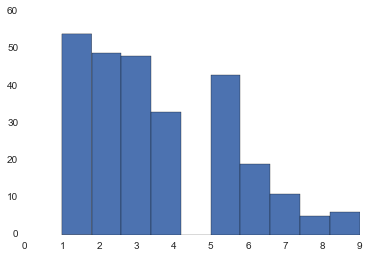

In [10]:
magic_data['UR_Aggro'].hist()

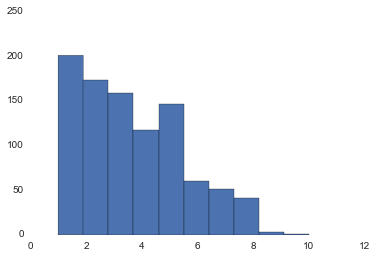

In [9]:
magic_data['Birthing_Pod'].hist()

In [26]:
magic_data.columns

Index([u'blue', u'red', u'green', u'white', u'black', u'top_four', u'top_two', u'Rainbow', u'Ad_Nauseam', u'Affinity', u'Aura_Hexproof', u'BUG', u'Bant', u'Birthing_Pod', u'Bloom_Titan', u'Blue_Moon', u'Boremandos', u'Boros', u'Delverless_RUG', u'Dredgevine', u'Elemental_Combo', u'Faeries', u'Genesis_Wave', u'Gift_Control', u'Gruul_Aggro', u'Hatebear', u'Hive_Mind', u'Infect', u'Instant_Reanimator', u'Jeskai_Ascendancy', u'Jund', u'Junk', u'Living_End', u'Loam', u'Martyr_Life', u'Merfolk', u'Mono_Black_Control', u'Orzhov_Midrange', u'Other_Aggro', u'Other_Combo', u'Other_Control', u'RUG_Aggro', u'Red_Deck_Wins', u'Scapeshift', u'Scepter', u'Sunny_Side_Up', u'Teaching_Control', u'The_Rock', u'Tokens', u'Twin_Exarch', u'UB_Delver', u'UR_Aggro', u'UR_Storm', u'UW_Control', u'UWx_Midrange', u'UrzaTron', u'Valakut', u'Zoo'], dtype='object')

###Step2: Build a simple logistic regression and visualize it


In [82]:
model = smf.ols('top_two ~ blue + red + green + white + black + Rainbow + Ad_Nauseam + Affinity + Aura_Hexproof + BUG + Bant + Birthing_Pod + Bloom_Titan + Blue_Moon + Boremandos + Boros + Delverless_RUG + Dredgevine + Elemental_Combo + Faeries + Genesis_Wave + Gift_Control + Gruul_Aggro + Hatebear + Hive_Mind + Infect + Instant_Reanimator + Jeskai_Ascendancy + Jund + Junk + Living_End + Loam + Martyr_Life + Merfolk + Mono_Black_Control + Orzhov_Midrange + Other_Aggro + Other_Combo + Other_Control + RUG_Aggro + Red_Deck_Wins + Scapeshift + Scepter + Sunny_Side_Up + Teaching_Control + The_Rock + Tokens + Twin_Exarch + UB_Delver + UR_Aggro + UR_Storm + UW_Control + UWx_Midrange + UrzaTron + Valakut + Zoo', data=magic_data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                top_two   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     261.3
Date:                Tue, 24 Mar 2015   Prob (F-statistic):               0.00
Time:                        18:12:22   Log-Likelihood:                -2183.4
No. Observations:                9427   AIC:                             4481.
Df Residuals:                    9370   BIC:                             4889.
Df Model:                          56                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              1.0159      0.021     49.257      0.000         0.975     1.056
blue                   0.0031      0.016      0.198      0.843        -0.028     0.034
red                    0.0223      0.014      1.583      0.114        -0.005     0.050
green                 -0.0017      0.013     -0.126      0.899        -0.028     0.025
white                  0.0147      0.014      1.070      0.285        -0.012     0.042
black                  0.0120      0.016      0.731      0.465        -0.020     0.044
Rainbow               -0.1805      0.011    -16.439      0.000        -0.202    -0.159
Ad_Nauseam            -0.2045      0.010    -21.249      0.000        -0.223    -0.186
Affinity              -0.1965      0.004    -54.541      0.000        -0.204    -0.189
Aura_Hexproof         -0.1838      0.008    -24.143      0.000        -0.199    -0.169
BUG                   -0.1980      0.019    -10.385      0.000        -0.235    -0.161
Bant                  -0.1857      0.012    -15.857      0.000        -0.209    -0.163
Birthing_Pod          -0.1898      0.004    -47.232      0.000        -0.198    -0.182
Bloom_Titan           -0.1809      0.008    -23.653      0.000        -0.196    -0.166
Blue_Moon             -0.1681      0.011    -14.742      0.000        -0.190    -0.146
Boremandos            -0.1781      0.010    -18.290      0.000        -0.197    -0.159
Boros                 -0.2279      0.016    -14.066      0.000        -0.260    -0.196
Delverless_RUG        -0.2016      0.020    -10.073      0.000        -0.241    -0.162
Dredgevine            -0.1877      0.014    -13.204      0.000        -0.216    -0.160
Elemental_Combo       -0.1620      0.031     -5.243      0.000        -0.223    -0.101
Faeries               -0.1909      0.007    -25.566      0.000        -0.206    -0.176
Genesis_Wave          -0.2297      0.020    -11.666      0.000        -0.268    -0.191
Gift_Control          -0.1915      0.008    -23.331      0.000        -0.208    -0.175
Gruul_Aggro           -0.1815      0.011    -16.266      0.000        -0.203    -0.160
Hatebear              -0.1844      0.007    -26.921      0.000        -0.198    -0.171
Hive_Mind             -0.1725      0.017    -10.380      0.000        -0.205    -0.140
Infect                -0.1734      0.007    -24.864      0.000        -0.187    -0.160
Instant_Reanimator    -0.2182      0.016    -13.990      0.000        -0.249    -0.188
Jeskai_Ascendancy     -0.1745      0.022     -7.943      0.000        -0.218    -0.131
Jund                  -0.1965      0.004    -45.255      0.000        -0.205    -0.188
Junk                  -0.1873      0.005    -34.351      0.000        -0.198    -0.177
Living_End            -0.1869      0.008    -22.584      0.000        -0.203    -0.171
Loam                  -0.1980      0.012    -17.148      0.000        -0.221    -0.175
Martyr_Life           -0.1849 

In [95]:
model2 = smf.ols('top_two ~ Affinity + Aura_Hexproof + Birthing_Pod + Gift_Control + Gruul_Aggro + Hatebear + Instant_Reanimator + Jund + Junk + Living_End + Loam + Merfolk + Mono_Black_Control + Red_Deck_Wins + Scapeshift + Twin_Exarch + UB_Delver + UR_Aggro + UR_Storm + UW_Control + UWx_Midrange + UrzaTron', data=magic_data)
fitted = model2.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                top_two   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     187.1
Date:                Tue, 24 Mar 2015   Prob (F-statistic):               0.00
Time:                        18:21:02   Log-Likelihood:                -4906.2
No. Observations:                9427   AIC:                             9858.
Df Residuals:                    9404   BIC:                         1.002e+04
Df Model:                          22                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.7114      0.007    109.163      0.000         0.699     0.724
Affinity              -0.1224      0.004    -31.462      0.000        -0.130    -0.115
Aura_Hexproof         -0.1165      0.009    -13.370      0.000        -0.134    -0.099
Birthing_Pod          -0.1166      0.004    -32.736      0.000        -0.124    -0.110
Gift_Control          -0.1205      0.009    -12.779      0.000        -0.139    -0.102
Gruul_Aggro           -0.1084      0.014     -7.729      0.000        -0.136    -0.081
Hatebear              -0.1167      0.007    -15.592      0.000        -0.131    -0.102
Instant_Reanimator    -0.1362      0.020     -6.719      0.000        -0.176    -0.096
Jund                  -0.1202      0.004    -30.665      0.000        -0.128    -0.113
Junk                  -0.1181      0.006    -19.684      0.000        -0.130    -0.106
Living_End            -0.1127      0.010    -11.030      0.000        -0.133    -0.093
Loam                  -0.1275      0.015     -8.714      0.000        -0.156    -0.099
Merfolk               -0.1135      0.007    -16.808      0.000        -0.127    -0.100
Mono_Black_Control    -0.1182      0.015     -7.893      0.000        -0.148    -0.089
Red_Deck_Wins         -0.1160      0.005    -23.851      0.000        -0.126    -0.106
Scapeshift            -0.1141      0.005    -20.833      0.000        -0.125    -0.103
Twin_Exarch           -0.1172      0.004    -31.415      0.000        -0.125    -0.110
UB_Delver             -0.1219      0.021     -5.823      0.000        -0.163    -0.081
UR_Aggro              -0.1178      0.006    -18.512      0.000        -0.130    -0.105
UR_Storm              -0.1151      0.006    -19.136      0.000        -0.127    -0.103
UW_Control            -0.1152      0.007    -16.627      0.000        -0.129    -0.102
UWx_Midrange          -0.1189      0.005    -24.475      0.000        -0.128    -0.109
UrzaTron              -0.1231      0.005    -26.302      0.000        -0.132    -0.114
==============================================================================
Omnibus:                     4986.632   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.723
Skew:                          -0.288   Prob(JB):                    9.01e-139
Kurtosis:                       1.865   Cond. No.                         7.03
==============================================================================
"""

### Step 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables

In [86]:
X = magic_data[[u'Affinity', u'Birthing_Pod', u'Jund', u'UrzaTron', u'UWx_Midrange', u'Red_Deck_Wins', u'Scapeshift', u'Junk', u'UR_Storm', u'UR_Aggro', u'Merfolk']]

y = magic_data['top_two']

In [87]:
# instantiate a logistic regression model, and fit with X and y
mod = LogisticRegression()
mod = mod.fit(X, y)

# check the accuracy on the training set
mod.score(X, y)

0.52604221915773841

In [90]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(mod.coef_)))

,0,1
0,Affinity,[-0.517627441347]
1,Birthing_Pod,[-0.496888501993]
2,Jund,[-0.494543907388]
3,UrzaTron,[-0.560118504289]
4,UWx_Midrange,[-0.503549701631]
5,Red_Deck_Wins,[-0.519348590913]
6,Scapeshift,[-0.473551520919]
7,Junk,[-0.530487958538]
8,UR_Storm,[-0.505854110632]
9,UR_Aggro,[-0.505222238153]


In [91]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12)
mod2 = LogisticRegression()
mod2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [92]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[1 1 0 ..., 0 1 1]


In [93]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[ 0.40203479  0.59796521]
 [ 0.40203479  0.59796521]
 [ 0.96447405  0.03552595]
 ..., 
 [ 0.64007248  0.35992752]
 [ 0.40203479  0.59796521]
 [ 0.40203479  0.59796521]]


In [94]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.524928019397
0.679242565757


###Step 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [74]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.56567797  0.55779427  0.4835631   0.71580064  0.46871686  0.61823966
  0.38641189  0.47239915  0.53397028  0.4118896 ]
0.521446340715


### Step 5: Evaluate Feature Importance

In [75]:
logit = smf.Logit(y, X)

In [76]:
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.578586
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                top_two   No. Observations:                 9427
Model:                          Logit   Df Residuals:                     9416
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Mar 2015   Pseudo R-squ.:                  0.1360
Time:                        18:07:36   Log-Likelihood:                -5454.3
converged:                       True   LL-Null:                       -6312.9
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Affinity         -0.4042      0.027    -14.706      0.000        -0.458    -0.350
Birthing_Pod     -0.3877      0.025    -15.347      0.000        -0.437    -0.338
Jund             -0.3812      0.027    -14.275      0.000        -0.434    -0.329
UrzaTron         -0.4463      0.038    -11.891      0.000        -0.520    -0.373
UWx_Midrange     -0.3945      0.036    -11.052      0.000        -0.464    -0.325
Red_Deck_Wins    -0.4113      0.038    -10.732      0.000        -0.486    -0.336
Scapeshift       -0.3666      0.040     -9.274      0.000        -0.444    -0.289
Junk             -0.4198      0.048     -8.723      0.000        -0.514    -0.325
UR_Storm         -0.3980      0.047     -8.466      0.000        -0.490    -0.306
UR_Aggro         -0.3955      0.048     -8.209      0.000        -0.490    -0.301
Merfolk          -0.3508      0.048     -7.353      0.000        -0.444    -0.257
=================================================================================
"""

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [96]:
def plot_roc_curve(y_test, probs, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

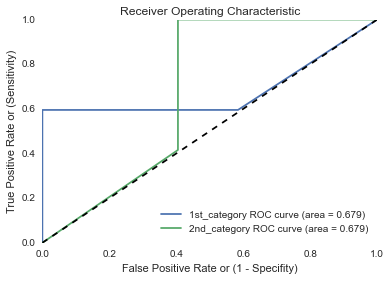

In [97]:
categories = [ '1st_category', '2nd_category']

plot_roc_curve(y_test, probs, categories)

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [63]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[0 1 0 ..., 1 1 0]


In [64]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[  8.53697876e-01   1.46302124e-01]
 [  4.85239188e-03   9.95147608e-01]
 [  9.99999946e-01   5.40092245e-08]
 ..., 
 [  1.10986784e-01   8.89013216e-01]
 [  5.25869662e-03   9.94741303e-01]
 [  8.73078382e-01   1.26921618e-01]]


In [65]:
probs[1]

array([ 0.00485239,  0.99514761])